# Electric Vehicle Data Analysis 

### **Imports**

In [34]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pandas import ExcelWriter
from pandas import ExcelFile

### **Fetching Datasets**

In [35]:
# fetching dataset - 1
df1 = pd.read_csv('ev_charger_dataset 1.csv')
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [36]:
# fetching dataset - 2
df2 = pd.read_excel('ev_charging_station_dataset 2.xlsx', sheet_name='Table 4', header=1)
df2.head()

,State/UT,EV Charging Facility
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [37]:
# fetching dataset - 3
df3 = pd.read_excel('ev_market_india_dataset 3.xlsx')
df3.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


### **Exploratory Data Analysis (EDA)**

### *Analysing the datasets*

In [38]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)

DF1 Shape:  (24, 6)
DF2 Shape:  (31, 2)
DF3 Shape:  (103, 14)


In [39]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())
print(' <<< DATASET 3 -----------------------------------------------------------')
print(df3.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UT              31 non-null     object
 1   EV Charging Facility  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes
None
 <<< DATASET 3 ------------

In [40]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
d3 = df3.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2, '<<< DATASET 3 >>>', d3)

'<<< DATASET 1 >>>'

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


'<<< DATASET 2 >>>'

,EV Charging Facility
count,31.000000
mean,49.548387
std,50.768651
min,1.000000
25%,4.000000
50%,26.000000
75%,81.500000
max,174.000000


'<<< DATASET 3 >>>'

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


### *Analysis of 2-wheeler EVs*
Observation: Maharashtra, Gujarat, Tamilnadu, Karnataka and Andhra Pradesh are among the top states with the majority of EV 2-wheelers while Assam, Himachal Pradesh, Sikkim, J&K with the least.


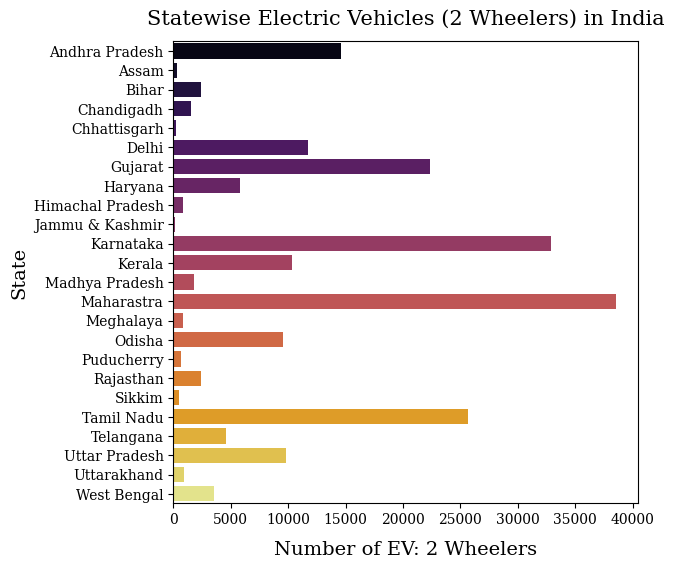

In [41]:
# 2 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='2W', palette='inferno')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

### *Analysis of 3-wheeler EVs*
Observation: Uttar Pradesh, Assam and Bihar are among the top states with the majority of EV 3-wheelers while the remaining states don't seem to depend on the same.

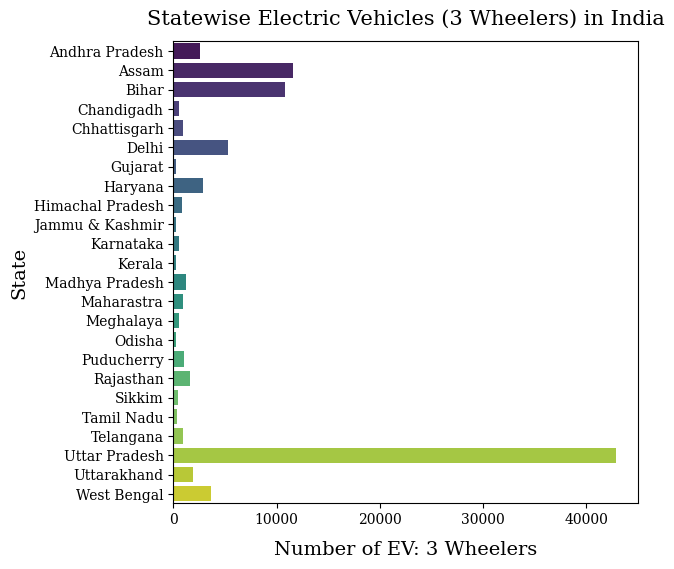

In [42]:
# 3 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='3W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

### *Analysis 4-wheeler EVs*
Observation: Maharashtra, Delhi, Karnataka, Kerala and Andhra Pradhesh are among the top states with the majority of EV 4-wheelers while the remaining states have less number of EV 4-wheelers.

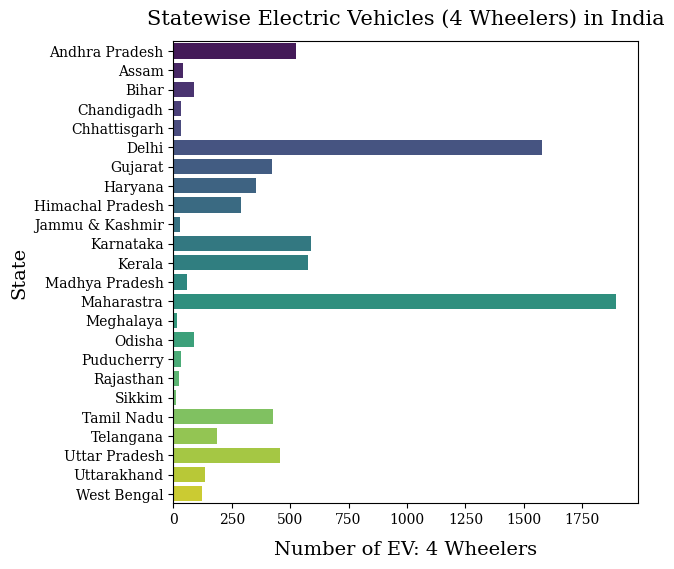

In [43]:
# 4 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='4W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15,pad=12)
plt.show()

### *Analysis of charging stations sanctioned*
Observation: Maharashtra, Gujarat, Karnataka, Kerala, Uttar Pradesh, Rajasthan, and Andhra Pradhesh are among the top states with the majority of EV charging stations sanctioned while the remaining states have less number of the same.

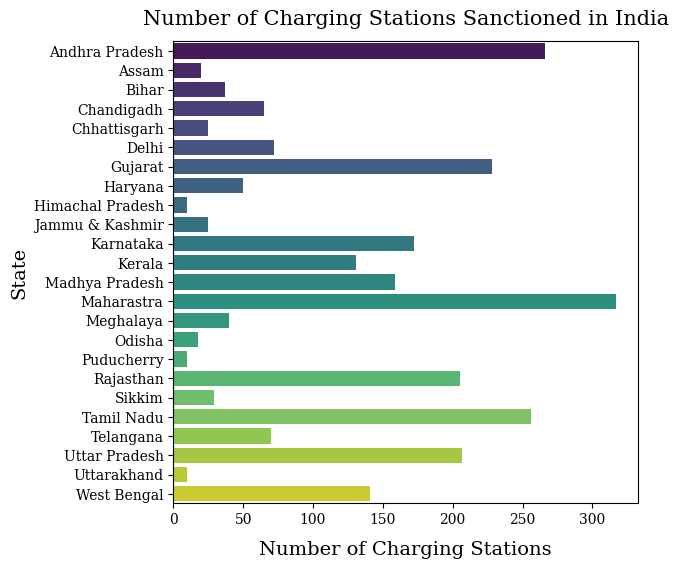

In [44]:
# charging stations sanctioned visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='Chargers', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Charging Stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Number of Charging Stations Sanctioned in India', weight=200, family='serif', size=15, pad=12)
plt.show()

### *Analysis of EVs based on brands*
Observation: Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market. 

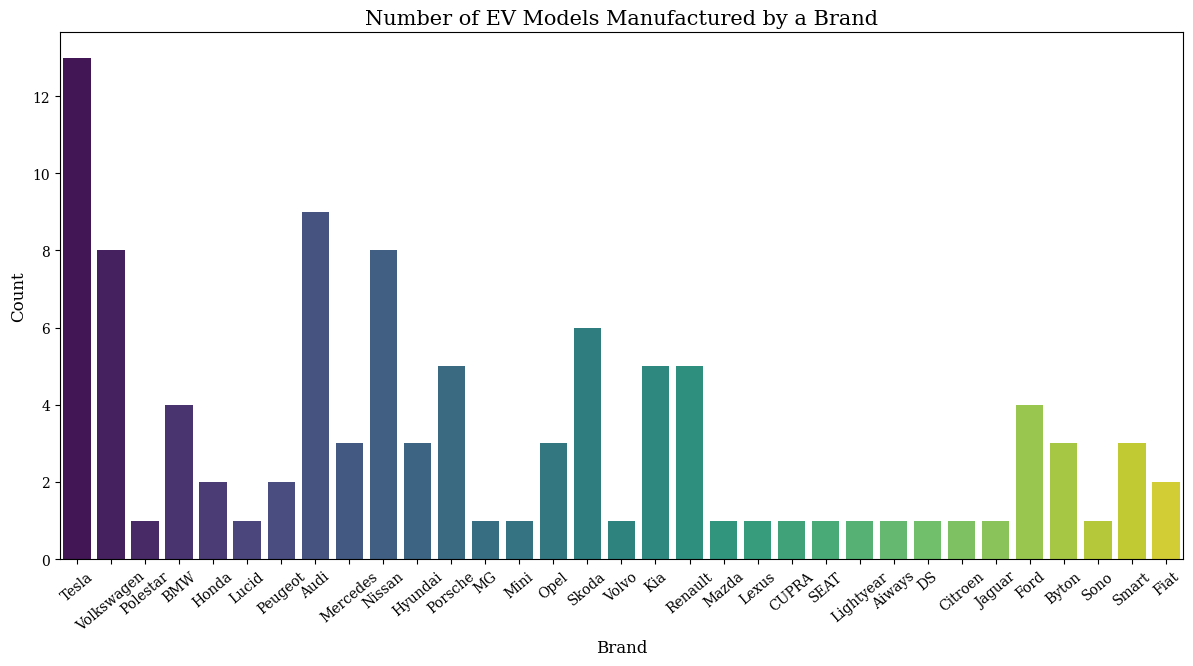

In [45]:
# brand-wise count of EV models
sns.catplot(data=df3, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

### *Analysis of the number of seats by each brand*
Observation: Based on the number of seats, Tesla, Mercedes and Nissan have the maximum number of seats and Smart the minimum.

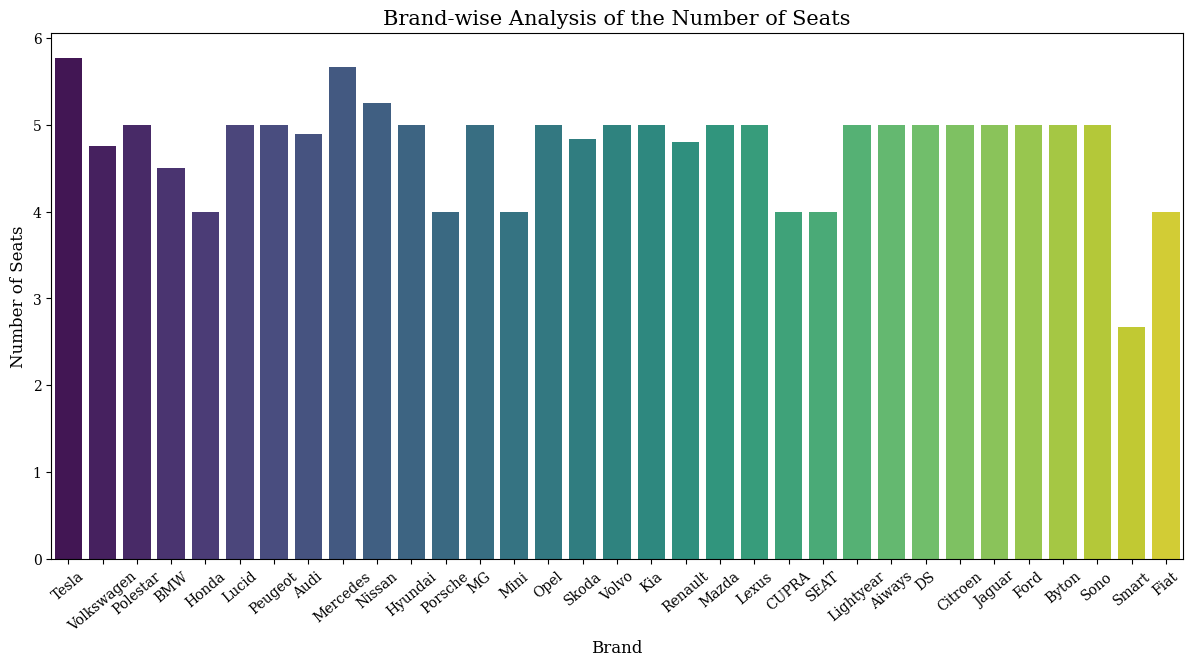

In [46]:
# brand-wise analysis of the number of seats
sns.catplot(kind='bar', data=df3, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15);

### *Analysis of different plug types*
Observation: EVs with plus type of 'Type 2 CCS' seem to dominate the market.  

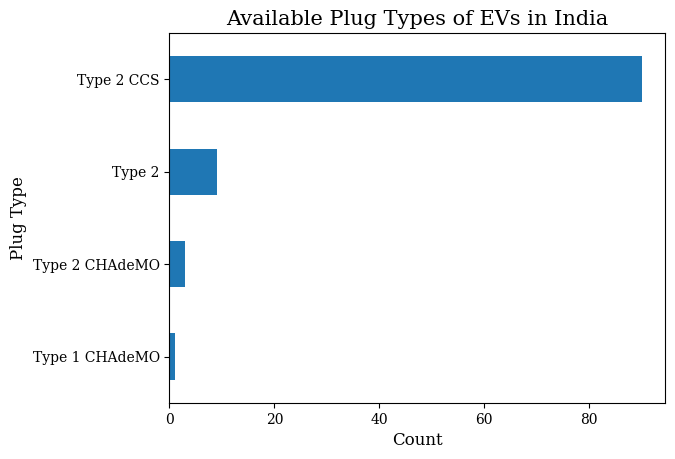

In [47]:
# plug types visualization from dataset 3
df3['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()

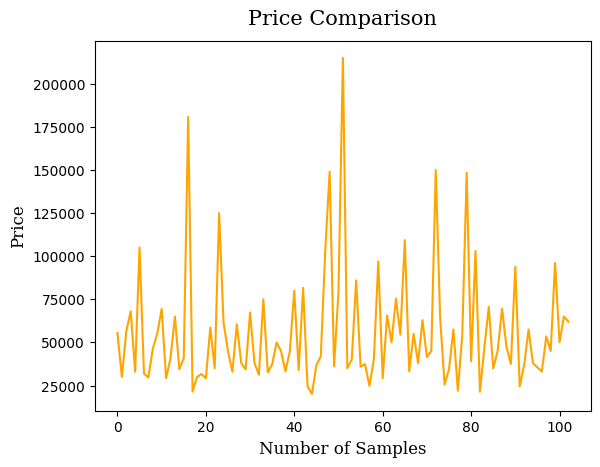

In [48]:
# plotting the price from dataset 3
plt.plot(df3['PriceEuro'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);

### *Analysis of EVs based on accleration*
Observation: Based on accleration, EVs from Renault, Seat and Smart are the top performers while Tesla, Lucid and Porsche dont make it to the same.

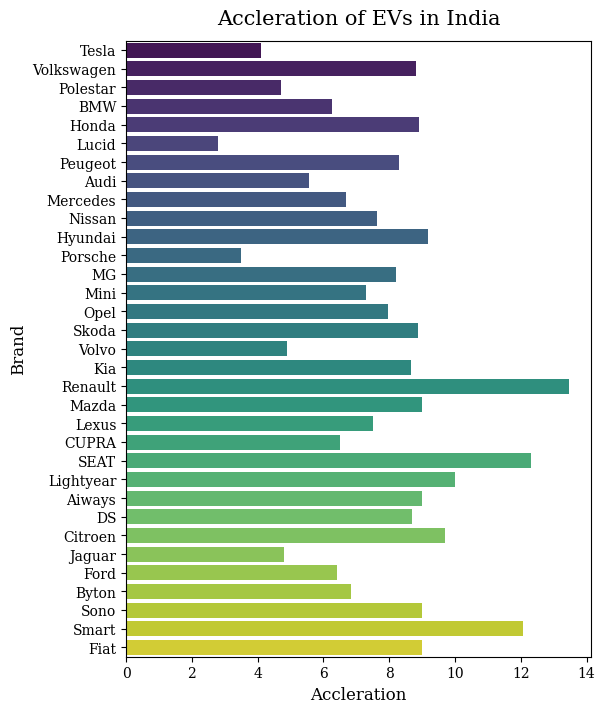

In [49]:
# accleration visualization from dataset 3
plt.figure(figsize=(6, 8))
sns.barplot(data=df3, y='Brand', x='AccelSec', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

### *Analysis of EVs based on speed*
Observation: Based on speed parameter, EVs from Tesla, Lucid and Porsche are the top performers while Renault, Smart and SEAT dont make it to the same.

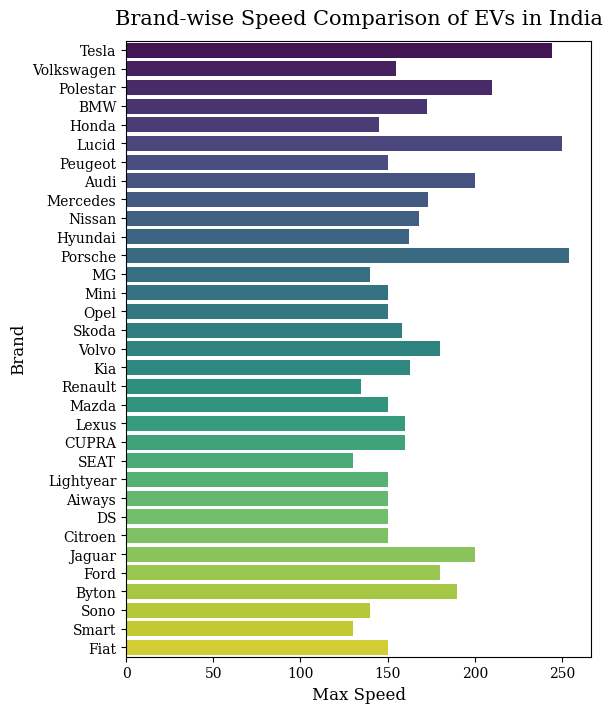

In [50]:
# speed visualization from dataset 3
plt.figure(figsize=(6, 8))
sns.barplot(data=df3, x='TopSpeed_KmH', y='Brand', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()

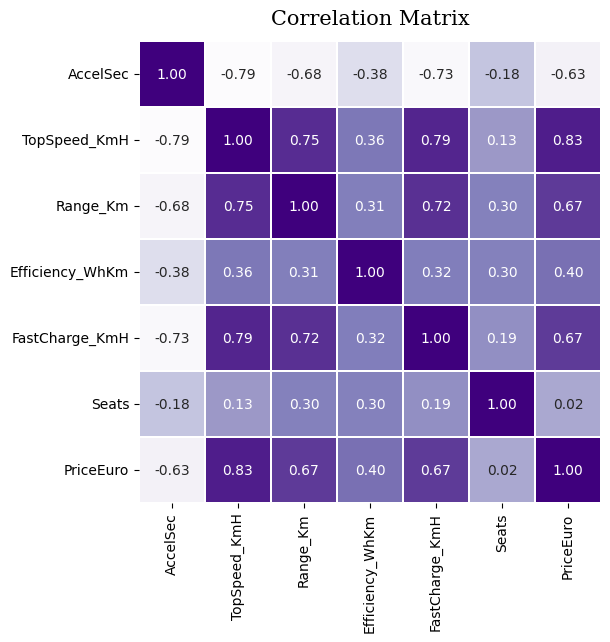

In [51]:
# plotting the correlation matrix from dataset 3
plt.figure(figsize=(6,6))
sns.heatmap(data=df3.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

### *Analysis of EVs based on the range parameter*
Observation: Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.

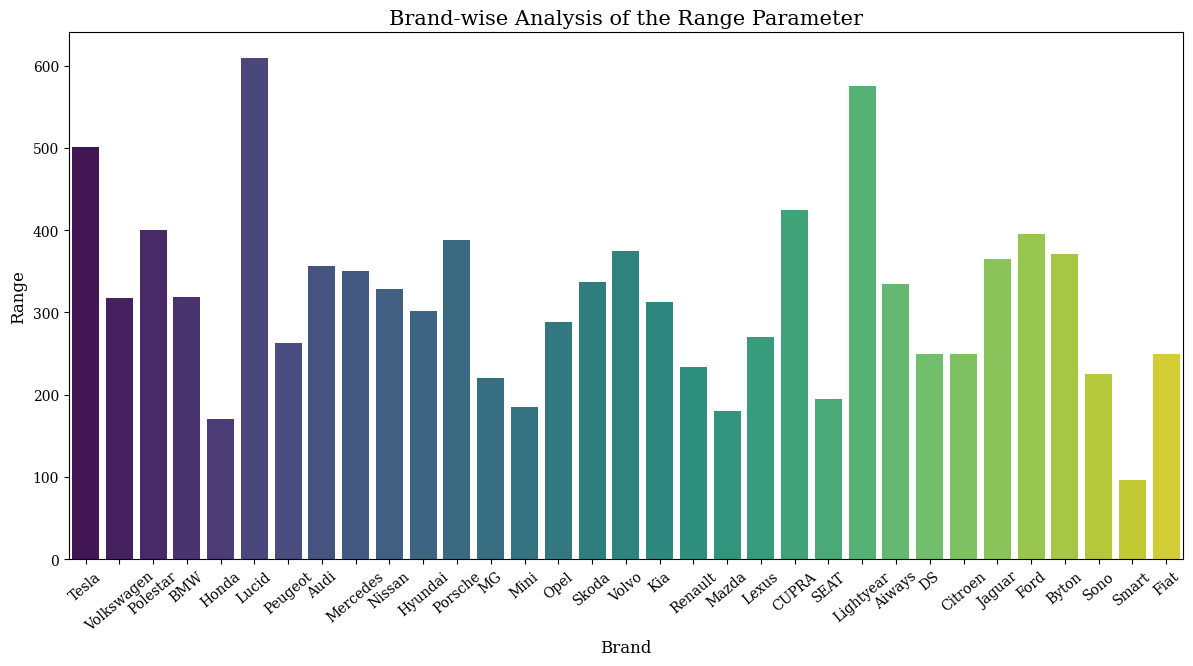

In [52]:
# brand-wise analysis of the range parameter
sns.catplot(kind='bar', data=df3, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15);

### **Model Building Using K-Means Clusteing**

In [53]:
# encoding the categorical features

# PowerTrain feature
df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df3['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [54]:
# selecting features for building a model
X = df3[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [55]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


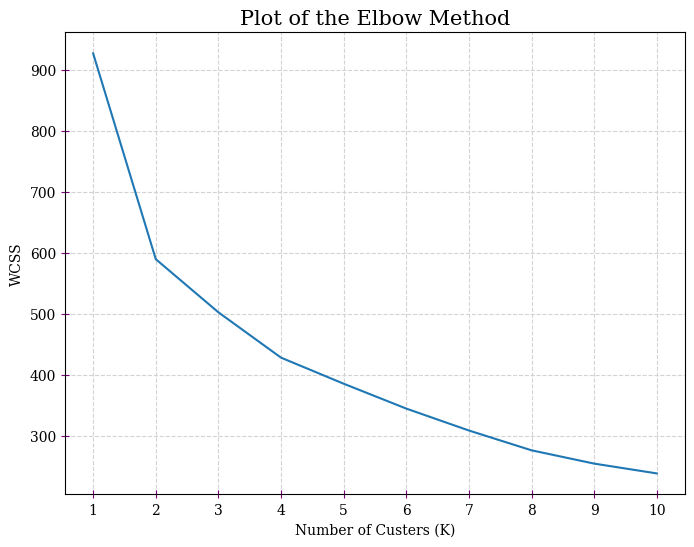

In [57]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [58]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [59]:
# check the labels assigned to each data point
print(kmean.labels_)

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]


In [60]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

1    39
2    32
3    19
0    13
dtype: int64

In [61]:
# adding a new feature of cluster labels to the dataset 3
df3['clusters'] = kmean.labels_

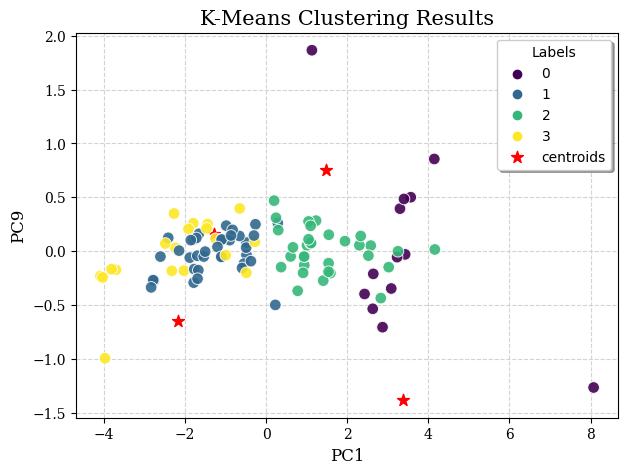

In [62]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()